# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Reading Data

In [2]:
data = pd.read_csv('./data/jkuatStudents.csv')
print(data.shape)
data.head()

(960, 55)


,studentId,school,current_sem,cs01,cs02,cs03,cs04,cs05,cs06,cs07,...,time_spent,ai_industry,cs_industry,da_industry,gd_industry,ho_industry,is_industry,na_industry,sd_industry,specialisation
0,1010,JKUAT,1.1,31.71,21.00,50,13.80,5.58,0.0,0.0,...,0,0,0,0,0,0,0,0,0,AI
1,1011,JKUAT,1.1,31.04,20.39,50,12.82,5.52,0.0,0.0,...,0,0,0,0,0,0,0,0,0,AI
2,1012,JKUAT,1.1,32.99,20.49,50,13.36,5.81,0.0,0.0,...,0,0,0,0,0,0,0,0,0,AI
3,1013,JKUAT,1.1,24.88,15.60,40,10.97,4.34,0.0,0.0,...,0,0,0,0,0,0,0,0,0,AI
4,1014,JKUAT,1.1,26.47,16.64,40,9.67,4.70,0.0,0.0,...,0,0,0,0,0,0,0,0,0,AI


# Data Visualisation

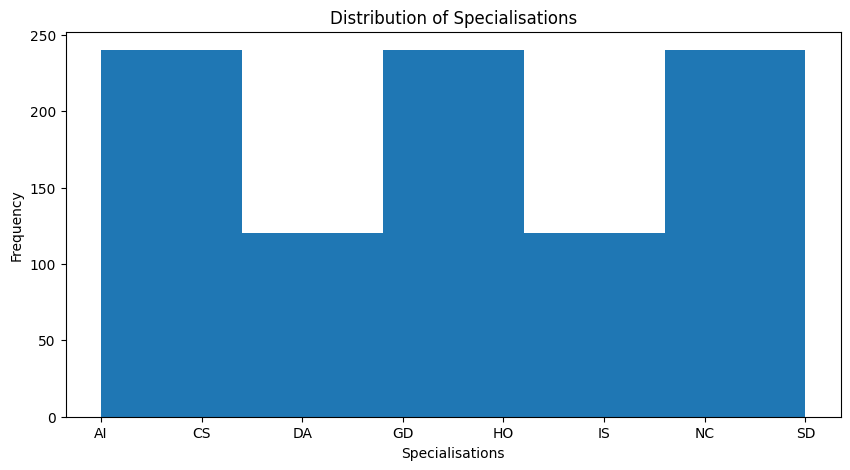

In [3]:
# Plot a histogram of the target variable
plt.figure(figsize=(10,5))
plt.hist(data['specialisation'], bins=5)
plt.title("Distribution of Specialisations")
plt.xlabel("Specialisations")
plt.ylabel("Frequency")
plt.show()

# Modelling

## Splitting Dataset

In [4]:
# Select main columns to be used in training
main_cols = data.columns.difference(['studentId', 'school', 'specialisation'])
X = data[main_cols]
y = data['specialisation']

In [5]:
X.columns

Index(['ai_industry', 'aspNet', 'c', 'c#', 'c++', 'cmake', 'cs01', 'cs02',
       'cs03', 'cs04', 'cs05', 'cs06', 'cs07', 'cs08', 'cs09', 'cs10', 'cs11',
       'cs12', 'cs13', 'cs14', 'cs15', 'cs16', 'cs17', 'cs18', 'cs_industry',
       'css', 'current_sem', 'da_industry', 'dart', 'gd_industry', 'go',
       'ho_industry', 'html', 'internships_no', 'is_industry', 'java',
       'javascript', 'jupyter', 'kotlin', 'na_industry', 'objective_c', 'php',
       'python', 'r', 'ruby', 'rust', 'scss', 'sd_industry', 'sql', 'swift',
       'time_spent', 'typescript'],
      dtype='object')

In [6]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(672, 52)
(288, 52)


## A bit of Pre-Processing

In [7]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Encode the target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

## Random Forest Classifier

In [9]:
# Train a random forest classifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [10]:
# Evaluate the model on the testing set
accuracy = model_rf.score(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [11]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)

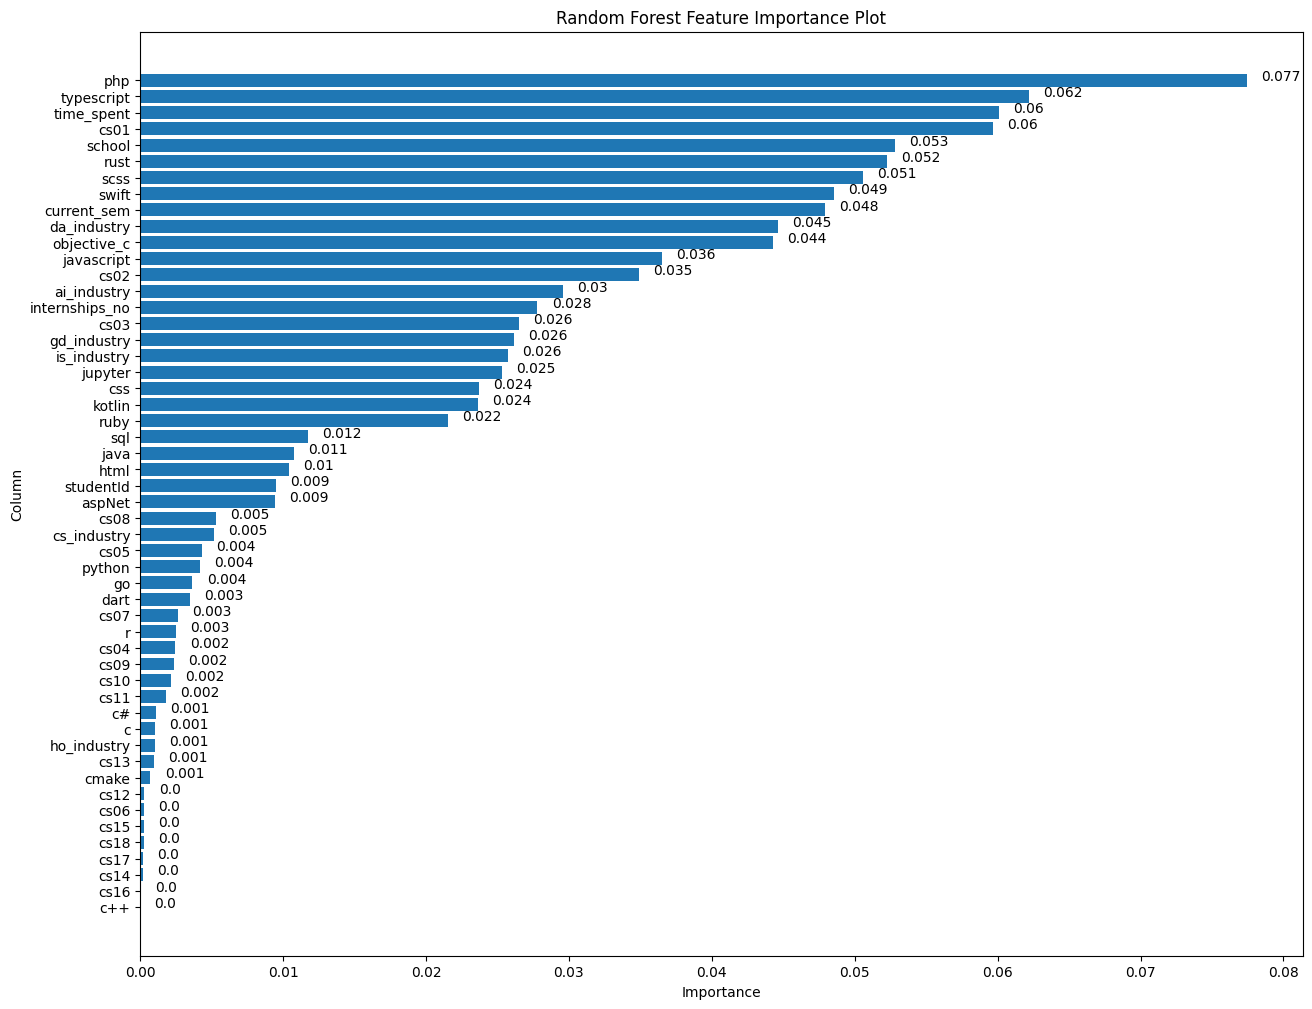

In [12]:
X_df = pd.DataFrame(X_train)

fig, ax = plt.subplots(figsize=(15, 12))
ax.barh(range(X_df.shape[1]), list(importances[indices]), align='center')
ax.set_yticks(range(X_df.shape[1]))
ax.set_yticklabels(data.columns[indices])
ax.set_xlabel('Importance')
ax.set_ylabel('Column')
ax.set_title('Random Forest Feature Importance Plot')

# Add the importance value at the end of each bar
for i, v in enumerate(importances[indices]):
    ax.text(v + 0.001, i, str(round(v, 3)))

plt.show()

# Exporting the Model

In [13]:
# save the trained classifier as a .pkl file
joblib.dump(model_rf, 'trainedModels/jkuatClassifier.pkl')

['trainedModels/jkuatClassifier.pkl']

# Make specialisation predictions on test data

In [15]:
# Create a new instance of student data to make predictions on
new_student = pd.DataFrame({
    'current_sem': [3.1],
    'cs01': [22.85],
    'cs02': [26.5],
    'cs03': [40],
    'cs04': [18.1],
    'cs05': [21.74],
    'cs06': [9.47],
    'cs07': [28.5],
    'cs08': [7.08],
    'cs09': [0],
    'cs10': [0],
    'cs11': [0],
    'cs12': [20],
    'cs13': [0],
    'cs14': [40],
    'cs15': [26.65],
    'cs16': [0],
    'cs17': [0],
    'cs18': [0],
    'academic_average': [23.72],
    'c': [14],
    'cmake': [14],
    'c++': [19.8],
    'java': [0],
    'javascript': [91.2],
    'python': [18.3],
    'r': [0],
    'jupyter': [0],
    'dart': [0],
    'kotlin': [0],
    'go': [0],
    'swift': [0],
    'c#': [0],
    'aspNet': [0],
    'typescript': [0],
    'php': [0],
    'objective_c': [0],
    'ruby': [0],
    'html': [1],
    'css': [9],
    'scss': [9],
    'sql': [0],
    'rust': [1],
    'internships_no': [0],
    'time_spent': [1],
    'ai_industry': [0],
    'cs_industry': [0],
    'da_industry': [0],
    'gd_industry': [0],
    'ho_industry': [0],
    'is_industry': [0],
    'na_industry': [0],
    'sd_industry': [1]
})
new_student = new_student[['ai_industry', 'aspNet', 'c', 'c#', 'c++', 'cmake', 'cs01', 'cs02',
       'cs03', 'cs04', 'cs05', 'cs06', 'cs07', 'cs08', 'cs09', 'cs10', 'cs11',
       'cs12', 'cs13', 'cs14', 'cs15', 'cs16', 'cs17', 'cs18', 'cs_industry',
       'css', 'current_sem', 'da_industry', 'dart', 'gd_industry', 'go',
       'ho_industry', 'html', 'internships_no', 'is_industry', 'java',
       'javascript', 'jupyter', 'kotlin', 'na_industry', 'objective_c', 'php',
       'python', 'r', 'ruby', 'rust', 'scss', 'sd_industry', 'sql', 'swift',
       'time_spent', 'typescript']]
new_student = scaler.transform(new_student)

In [16]:
# Get Student Prediction
preds = model_rf.predict(new_student)
preds = encoder.inverse_transform(preds)
preds

array(['CS'], dtype=object)

In [17]:
# Compute specialisation compatibility scores
probs = model_rf.predict_proba(new_student)
for spec, prob in zip(encoder.classes_, probs[0]):
    print(f'{spec}: {prob:.2f}')

AI: 0.00
CS: 0.38
DA: 0.22
GD: 0.02
HO: 0.25
IS: 0.05
NC: 0.07
SD: 0.00
